# IMDB Movie Reviews Dataset Analysis

In the first cell, we will:

1. Load the training and test datasets.
2. Inspect the basic structure and columns.
3. Explore the first few rows to understand the data format.


In [1]:
import pandas as pd

# Load the training dataset
train_file_path = "/kaggle/input/imdb-movie-reviews-dataset/train_data (1).csv"
df = pd.read_csv(train_file_path)

# Load the test dataset
test_file_path = "/kaggle/input/imdb-movie-reviews-dataset/test_data (1).csv"
extra_test_df = pd.read_csv(test_file_path)

# Display basic information about the training dataset
print("Training Dataset Shape:", df.shape)
print("\nTraining Dataset Columns:", df.columns.tolist())
print("\nFirst 5 rows of Training Dataset:\n", df.head())

# Display basic information about the extra test dataset
print("\nExtra Test Dataset Shape:", extra_test_df.shape)
print("\nExtra Test Dataset Columns:", extra_test_df.columns.tolist())
print("\nFirst 5 rows of Extra Test Dataset:\n", extra_test_df.head())

Training Dataset Shape: (25000, 2)

Training Dataset Columns: ['0', '1']

First 5 rows of Training Dataset:
                                                    0  1
0  This film is absolutely awful, but nevertheles...  0
1  Well since seeing part's 1 through 3 I can hon...  0
2  I got to see this film at a preview and was da...  1
3  This adaptation positively butchers a classic ...  0
4  Råzone is an awful movie! It is so simple. It ...  0

Extra Test Dataset Shape: (25000, 2)

Extra Test Dataset Columns: ['0', '1']

First 5 rows of Extra Test Dataset:
                                                    0  1
0  I did not enjoy the film Eraser whatsoever. It...  0
1  Be very afraid of anyone who likes this film. ...  0
2  The 3rd and last big screen spin off from the ...  0
3  Barely three and a half years after just scrap...  1
4  I'm a big fan of the demonic puppets. Looking ...  0


# Accessing Sample Reviews from the Dataset

In this step, we will look at the first review in both the training and extra test datasets to understand their format.

In [2]:
df['0'][0]

'This film is absolutely awful, but nevertheless, it can be hilarious at times, although this humor is entirely unintentional.<br /><br />The plot was beyond ridiculous. I don\'t even think a 2 year-old would be convinced by the ludicrous idiocy that the film-makers tried to slap together into a story. However, on the positive side, some of the horrifically inane plot twists provide a great deal of humor. For example, "Wow, Lady Hogbottom has a giant missile hidden in her back yard!" It gets worse (and even funnier), but I\'ll spare you.<br /><br />The acting is generally laughable. Most of the kids\' roles are sort of cute, but not very believable. On the other hand, Annie is pretty awful all-around. The adults don\'t take their roles seriously at all, but this is largely a good thing. If they\'d tried to be believable, the film would\'ve been even worse. Which is difficult to imagine.<br /><br />Once you get past the overall crappiness of the movie, there are actually a few standout 

In [3]:
extra_test_df['0'][0]

"I did not enjoy the film Eraser whatsoever. It's awful acting, boring storyline and average special effects made this an annoying arnie film, as it had a mountain of potential. With other action films of the time Eraser fell very short!!!"

# Text Preprocessing for IMDB Reviews

In this step, we will preprocess the movie reviews by:
1. Removing HTML tags.
2. Removing punctuation and numbers.
3. Converting text to lowercase.
4. Removing English stopwords.
5. Storing the cleaned text in a new column `preprocessed`.


In [4]:
import pandas as pd
import re
import string
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Define a function to clean text
def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # Remove punctuation and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    text = " ".join(word for word in text.split() if word not in stop_words)
    
    return text

# Apply the cleaning function to both datasets
df["preprocessed"] = df["0"].apply(clean_text)
extra_test_df["preprocessed"] = extra_test_df["0"].apply(clean_text)

# Display the first few rows of the preprocessed training dataset
print(df.head())

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                   0  1  \
0  This film is absolutely awful, but nevertheles...  0   
1  Well since seeing part's 1 through 3 I can hon...  0   
2  I got to see this film at a preview and was da...  1   
3  This adaptation positively butchers a classic ...  0   
4  Råzone is an awful movie! It is so simple. It ...  0   

                                        preprocessed  
0  film absolutely awful nevertheless hilarious t...  
1  well since seeing parts honestly say never mad...  
2  got see film preview dazzled typical romantic ...  
3  adaptation positively butchers classic beloved...  
4  rzone awful movie simple seems tried make movi...  


# Inspecting Preprocessed Reviews

After cleaning the text, let's check the first review from both the training and extra test datasets to see the effect of preprocessing. This helps verify that HTML tags, punctuation, numbers, and stopwords have been removed.

In [5]:
df['preprocessed'][0]

'film absolutely awful nevertheless hilarious times although humor entirely unintentionalthe plot beyond ridiculous dont even think yearold would convinced ludicrous idiocy filmmakers tried slap together story however positive side horrifically inane plot twists provide great deal humor example wow lady hogbottom giant missile hidden back yard gets worse even funnier ill spare youthe acting generally laughable kids roles sort cute believable hand annie pretty awful allaround adults dont take roles seriously largely good thing theyd tried believable film wouldve even worse difficult imagineonce get past overall crappiness movie actually standout moments almostnotcrappiness scene lady hogbottoms son runs away maid surprisingly hilarious though annoying letdown get caught police butler character minor ray sunlight almost never quite pierces gloomwatching movie actually caused physical pain nevertheless redeeming parts made almost watchable without beginning hemorrhage internally judged go

In [6]:
extra_test_df['preprocessed'][0]

'enjoy film eraser whatsoever awful acting boring storyline average special effects made annoying arnie film mountain potential action films time eraser fell short'

# Saving Preprocessed Datasets

After completing the text preprocessing, we save both the training and extra test datasets to CSV files.  
This allows us to reuse the cleaned data for modeling without repeating the preprocessing steps.

In [7]:
# Export the preprocessed training dataset
df.to_csv("preprocessed_train.csv", index=False)

# Export the preprocessed extra test dataset
extra_test_df.to_csv("preprocessed_extra_test.csv", index=False)

print("Both datasets have been saved successfully.")

Both datasets have been saved successfully.


# Splitting Data into Train and Test Sets

In this step, we:

1. Separate features (`X`) and labels (`y`) from the preprocessed training dataset.
2. Use `train_test_split` to split the dataset into training (80%) and test (20%) sets.
3. Apply stratification to preserve the original class distribution.
4. Also check the size and class distribution of the training, test, and extra test datasets.


In [8]:
from sklearn.model_selection import train_test_split

# Define features and labels
X = df["preprocessed"]
y = df["1"]  # Target column in training set
Extra = extra_test_df["1"]  # Labels in extra test set

# Split the dataset into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Display dataset sizes
print("Train size:", len(X_train))
print("Test size:", len(X_test))
print("Extra Test size:", len(Extra))

# Display class distributions
print("\nClass distribution in training set:\n", y_train.value_counts(normalize=True))
print("\nClass distribution in test set:\n", y_test.value_counts(normalize=True))
print("\nClass distribution in extra test set:\n", Extra.value_counts(normalize=True))
# Display columns
print(df.columns)
print(extra_test_df.columns)

Train size: 20000
Test size: 5000
Extra Test size: 25000

Class distribution in training set:
 1
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution in test set:
 1
1    0.5
0    0.5
Name: proportion, dtype: float64

Class distribution in extra test set:
 1
0    0.5
1    0.5
Name: proportion, dtype: float64
Index(['0', '1', 'preprocessed'], dtype='object')
Index(['0', '1', 'preprocessed'], dtype='object')


# Converting Text to TF-IDF Features

In this step, we transform the preprocessed text into numerical features using **TF-IDF (Term Frequency-Inverse Document Frequency)**.

- We limit the vocabulary to the top **42,000 words** (`max_features=42000`).  
  ⚠️ Note: This value was determined using optimization techniques (e.g., grid search over `max_features`), which are **not shown here due to time constraints**.
- Fit the TF-IDF vectorizer on the training set and transform the training, test, and extra test datasets.
- Finally, we check the shape of the resulting feature matrices.


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer with top 42,000 words
tfidf_vectorizer = TfidfVectorizer(max_features=42000)

# Fit on training data and transform train/test/extra test sets
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
extra_test_tfidf = tfidf_vectorizer.transform(extra_test_df["preprocessed"])

# Display shapes of TF-IDF matrices
print("TF-IDF Train Shape:", X_train_tfidf.shape)
print("TF-IDF Test Shape:", X_test_tfidf.shape)
print("TF-IDF Extra Test Shape:", extra_test_tfidf.shape)

TF-IDF Train Shape: (20000, 42000)
TF-IDF Test Shape: (5000, 42000)
TF-IDF Extra Test Shape: (25000, 42000)


# Training and Evaluating Multiple Classifiers

In this step, we train and evaluate several machine learning classifiers on the TF-IDF features:

1. **TF-IDF Vectorization**: We transform the training text into numerical features with `max_features=43,000`.
2. **Classifiers**:
   - Logistic Regression
   - Linear SVM
   - Multinomial Naive Bayes
   - Random Forest
   - Gradient Boosting
3. **Evaluation**:
   - Evaluate on 20% and extra test set
   - Compute accuracy, precision, recall, and F1-score.
   - Display the confusion matrix for each classifier to visualize performance.



===== Logistic Regression =====
TF-IDF Accuracy (Test Set): 0.8872
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.88      0.89      2500
           1       0.88      0.89      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

TF-IDF Accuracy (Extra Test Set): 0.8790
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



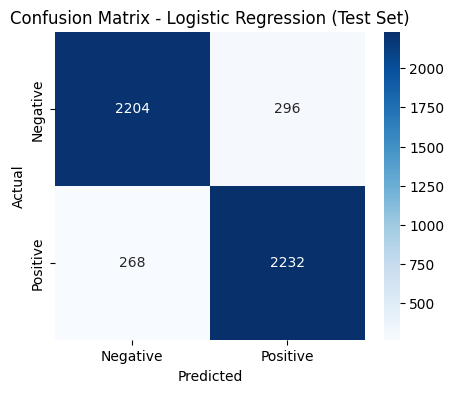

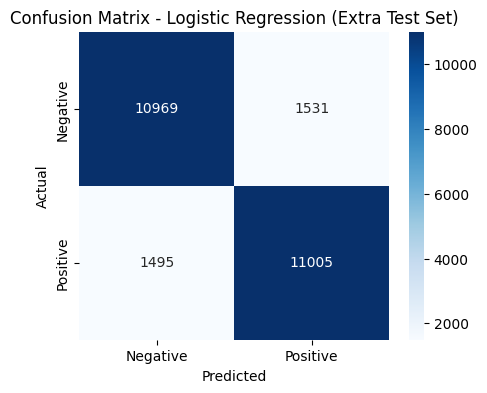


===== Linear SVM =====
TF-IDF Accuracy (Test Set): 0.8882
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2500
           1       0.89      0.89      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

TF-IDF Accuracy (Extra Test Set): 0.8689
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.86      0.88      0.87     12500
           1       0.88      0.86      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



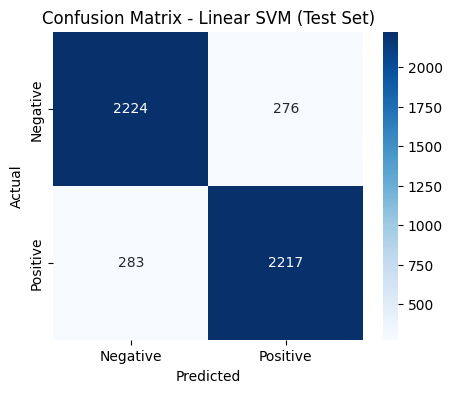

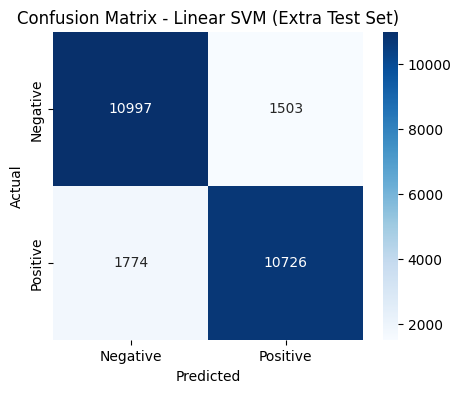


===== Multinomial NB =====
TF-IDF Accuracy (Test Set): 0.8672
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2500
           1       0.89      0.84      0.86      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

TF-IDF Accuracy (Extra Test Set): 0.8340
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84     12500
           1       0.87      0.78      0.83     12500

    accuracy                           0.83     25000
   macro avg       0.84      0.83      0.83     25000
weighted avg       0.84      0.83      0.83     25000



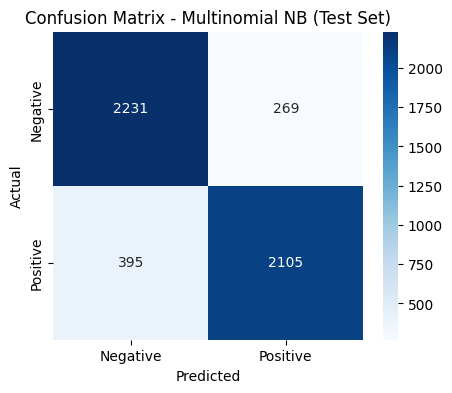

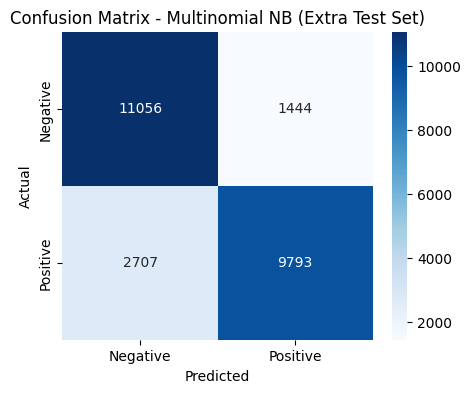


===== Random Forest =====
TF-IDF Accuracy (Test Set): 0.8554
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      2500
           1       0.87      0.84      0.85      2500

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000

TF-IDF Accuracy (Extra Test Set): 0.8510
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12500
           1       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



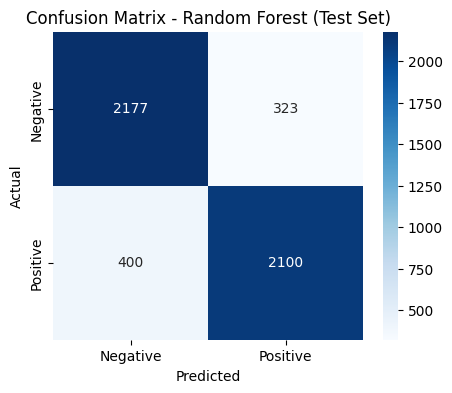

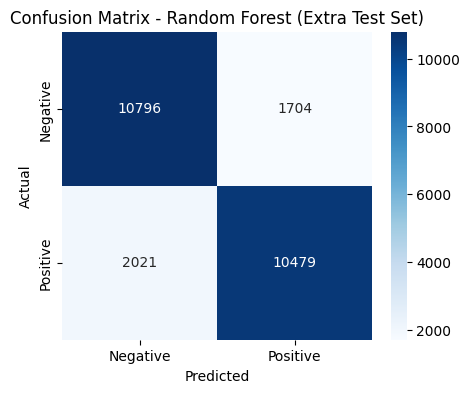


===== Gradient Boosting =====
TF-IDF Accuracy (Test Set): 0.8268
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      2500
           1       0.81      0.86      0.83      2500

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000

TF-IDF Accuracy (Extra Test Set): 0.8288
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.86      0.79      0.82     12500
           1       0.80      0.87      0.84     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000



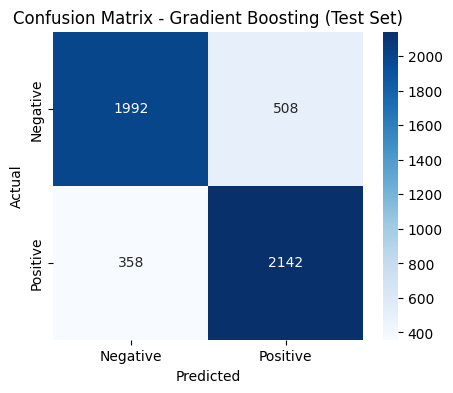

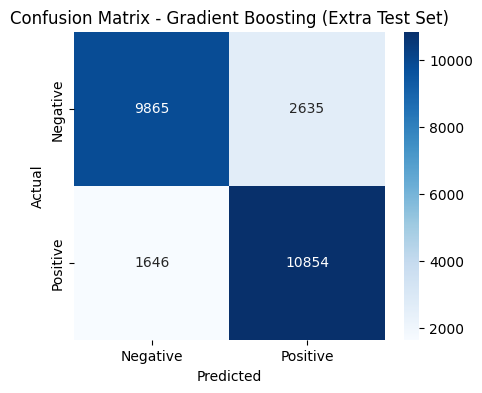


===== Stacking Ensemble (5 Classifiers) =====
TF-IDF Accuracy (Test Set): 0.8936
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2500
           1       0.90      0.88      0.89      2500

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000

TF-IDF Accuracy (Extra Test Set): 0.8772
Classification Report (Extra Test Set):
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     12500
           1       0.89      0.86      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



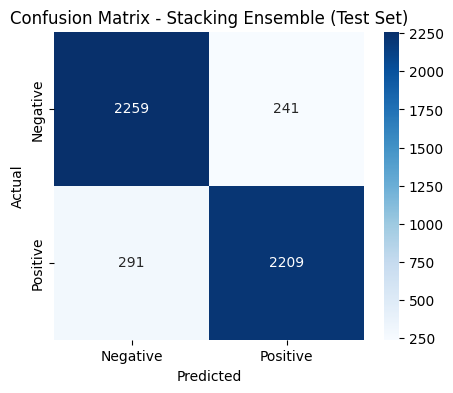

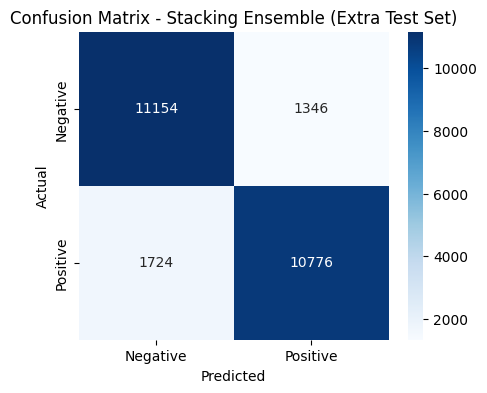

In [10]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Selected 5 classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(max_iter=200),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

# === Evaluate each classifier individually ===
for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    
    # Train
    clf.fit(X_train_tfidf, y_train)
    
    # Predictions on Test Set
    y_pred_test = clf.predict(X_test_tfidf)
    print(f"TF-IDF Accuracy (Test Set): {accuracy_score(y_test, y_pred_test):.4f}")
    print("Classification Report (Test Set):")
    print(classification_report(y_test, y_pred_test))
    
    # Predictions on Extra Test Set
    y_pred_extra = clf.predict(extra_test_tfidf)
    print(f"TF-IDF Accuracy (Extra Test Set): {accuracy_score(Extra, y_pred_extra):.4f}")
    print("Classification Report (Extra Test Set):")
    print(classification_report(Extra, y_pred_extra))
    
    # Confusion Matrix - Test Set
    cm_test = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name} (Test Set)")
    plt.show()
    
    # Confusion Matrix - Extra Test Set
    cm_extra = confusion_matrix(Extra, y_pred_extra)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_extra, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name} (Extra Test Set)")
    plt.show()

# === Stacking Ensemble (using all 5 classifiers) ===
print("\n===== Stacking Ensemble (5 Classifiers) =====")
estimators = [(name, model) for name, model in classifiers.items()]
stack_model = StackingClassifier(estimators=estimators, n_jobs=-1)

# Train Stacking
stack_model.fit(X_train_tfidf, y_train)

# Predictions on Test Set
y_pred_stack_test = stack_model.predict(X_test_tfidf)
print(f"TF-IDF Accuracy (Test Set): {accuracy_score(y_test, y_pred_stack_test):.4f}")
print("Classification Report (Test Set):")
print(classification_report(y_test, y_pred_stack_test))

# Predictions on Extra Test Set
y_pred_stack_extra = stack_model.predict(extra_test_tfidf)
print(f"TF-IDF Accuracy (Extra Test Set): {accuracy_score(Extra, y_pred_stack_extra):.4f}")
print("Classification Report (Extra Test Set):")
print(classification_report(Extra, y_pred_stack_extra))

# Confusion Matrix - Test Set
cm_stack_test = confusion_matrix(y_test, y_pred_stack_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm_stack_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Ensemble (Test Set)")
plt.show()

# Confusion Matrix - Extra Test Set
cm_stack_extra = confusion_matrix(Extra, y_pred_stack_extra)
plt.figure(figsize=(5,4))
sns.heatmap(cm_stack_extra, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Ensemble (Extra Test Set)")
plt.show()

# Hyperparameter Optimization for Classifiers

In this step, we optimize hyperparameters for all classifiers using **GridSearchCV**:

1. Define parameter grids for each classifier.
2. Use 5-fold stratified cross-validation to evaluate different hyperparameter combinations.
3. Select the best hyperparameters based on **accuracy**.
4. Display the best parameters and corresponding cross-validation score.


In [11]:
from sklearn.model_selection import GridSearchCV

# Define classifiers and their parameter grids
param_grids = {
    "Logistic Regression": {
        "classifier": LogisticRegression(max_iter=500, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "lbfgs"]
        }
    },
    "Linear SVM": {
        "classifier": LinearSVC(max_iter=5000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10]
        }
    },
    "Multinomial NB": {
        "classifier": MultinomialNB(),
        "params": {
            "alpha": [0.1, 0.5, 1.0]
        }
    },
    "Random Forest": {
        "classifier": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200, 500],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5]
        }
    },
    "Gradient Boosting": {
        "classifier": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [100, 200],
            "learning_rate": [0.01],
            "max_depth": [3, 5, 7]
        }
    }
}

# Run GridSearchCV for each classifier
best_classifiers = {}

for name, cfg in param_grids.items():
    print(f"\n===== {name} =====")
    grid = GridSearchCV(cfg["classifier"], cfg["params"], 
                        cv=5, scoring="accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train_tfidf, y_train)
    
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    
    best_classifiers[name] = grid.best_estimator_


===== Logistic Regression =====
Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'C': 10, 'solver': 'lbfgs'}
Best CV Accuracy: 0.8864999999999998

===== Linear SVM =====
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'C': 0.1}
Best CV Accuracy: 0.8848999999999998

===== Multinomial NB =====
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 0.5}
Best CV Accuracy: 0.86355

===== Random Forest =====
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Best CV Accuracy: 0.85165

===== Gradient Boosting =====
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
Best CV Accuracy: 0.7649


## Cross-Validation Evaluation with TF-IDF Features

In this step, we perform **Stratified 5-Fold Cross-Validation** to assess model performance on the training dataset using **TF-IDF** features.  

**Goal:**  
Identify which model performs best on the training data via cross-validation before final testing on unseen datasets, while also checking the diversity and distribution of the datasets across folds.



===== Logistic Regression =====
Cross-Validation Metrics:
Accuracy: 0.8840
Precision: 0.8732
Recall: 0.8985
F1-Score: 0.8857


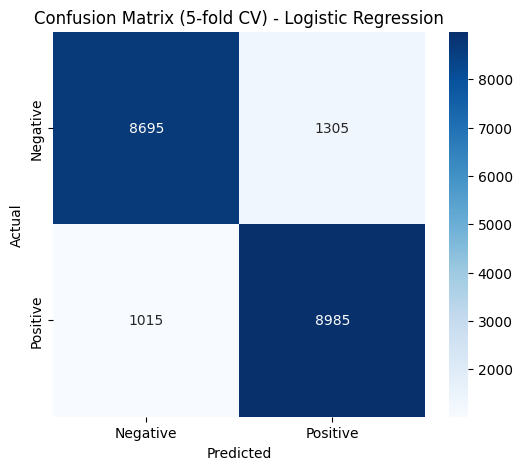


===== Linear SVM =====
Cross-Validation Metrics:
Accuracy: 0.8832
Precision: 0.8785
Recall: 0.8894
F1-Score: 0.8839


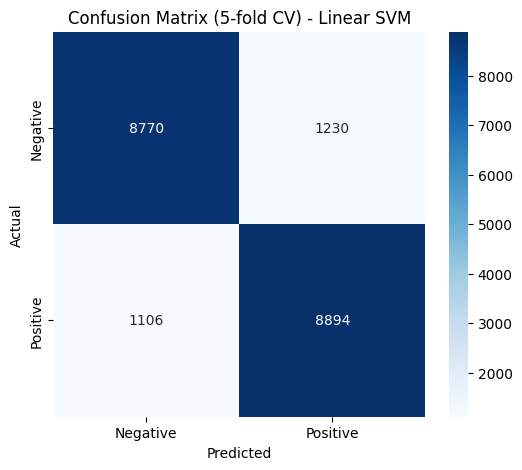


===== Multinomial NB =====
Cross-Validation Metrics:
Accuracy: 0.8609
Precision: 0.8719
Recall: 0.8461
F1-Score: 0.8588


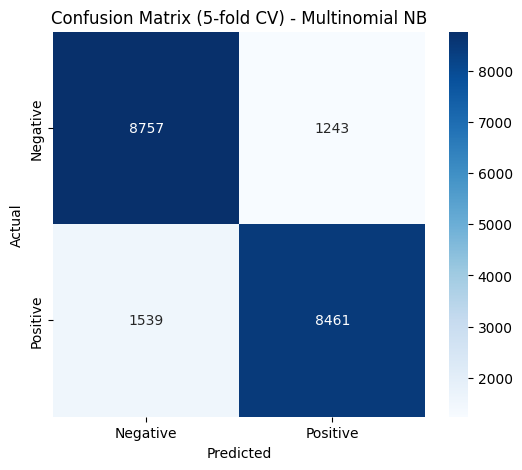


===== Random Forest =====
Cross-Validation Metrics:
Accuracy: 0.8502
Precision: 0.8520
Recall: 0.8478
F1-Score: 0.8499


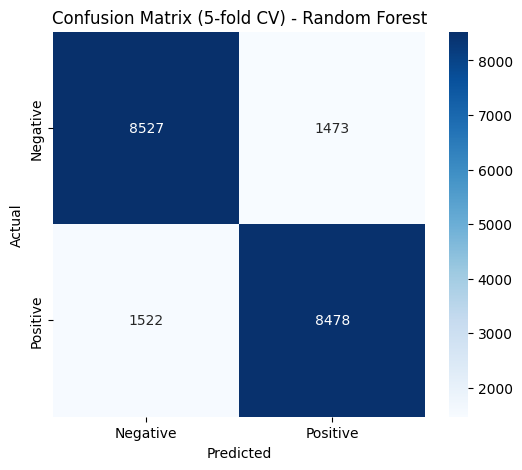


===== Gradient Boosting =====
Cross-Validation Metrics:
Accuracy: 0.8262
Precision: 0.8006
Recall: 0.8686
F1-Score: 0.8332


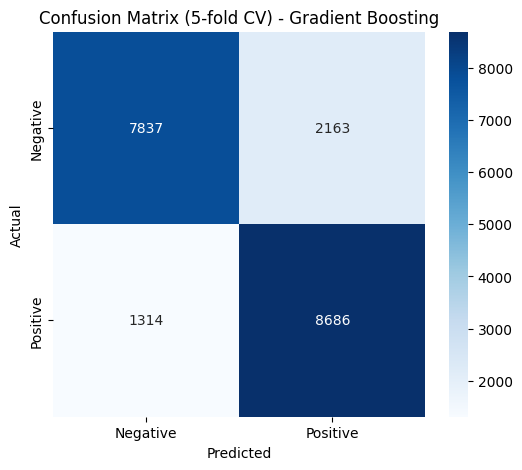

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# TF-IDF Vectorization (max 43,000 features)
tfidf_vectorizer = TfidfVectorizer(max_features=43000)
X_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(max_iter=200),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

# Stratified 5-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate each classifier
for name, clf in classifiers.items():
    print(f"\n===== {name} =====")
    
    # Cross-validation predictions
    y_pred_cv = cross_val_predict(clf, X_tfidf, y_train, cv=skf)
    
    # Compute metrics
    acc = accuracy_score(y_train, y_pred_cv)
    prec = precision_score(y_train, y_pred_cv, pos_label=1)
    rec = recall_score(y_train, y_pred_cv, pos_label=1)
    f1 = f1_score(y_train, y_pred_cv, pos_label=1)
    
    print(f"Cross-Validation Metrics:\nAccuracy: {acc:.4f}\nPrecision: {prec:.4f}\nRecall: {rec:.4f}\nF1-Score: {f1:.4f}")
    
    # Confusion matrix
    cm = confusion_matrix(y_train, y_pred_cv)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (5-fold CV) - {name}")
    plt.show()

# Stacking Ensemble for Text Classification

Since hyperparameter optimization did not significantly improve individual classifiers, we apply a **stacking ensemble** using all base models:

1. **Base Classifiers**: Logistic Regression, Linear SVM, Multinomial NB, Random Forest, Gradient Boosting.
2. **Final Estimator**: Logistic Regression, which learns from the predictions of base classifiers.
3. **Evaluation**:
   - Perform stratified 5-fold cross-validation on the training set.
   - Compute accuracy, precision, recall, and F1-score.
   - Visualize the confusion matrix for performance inspection.



===== Stacking Ensemble =====
Cross-Validation Metrics:
Accuracy: 0.8891
Precision: 0.8856
Recall: 0.8935
F1-Score: 0.8895


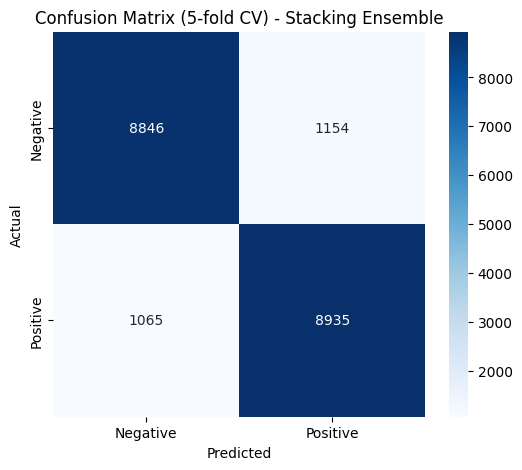

In [13]:
from sklearn.ensemble import StackingClassifier

# Define base classifiers for stacking
base_classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Linear SVM', LinearSVC(max_iter=200)),
    ('Multinomial NB', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42))
]

# Initialize stacking ensemble
stack_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(max_iter=200),
    n_jobs=-1
)

# Perform stratified 5-fold cross-validation
y_pred_stack_cv = cross_val_predict(stack_model, X_tfidf, y_train, cv=skf)

# Compute metrics
acc = accuracy_score(y_train, y_pred_stack_cv)
prec = precision_score(y_train, y_pred_stack_cv, pos_label=1)
rec = recall_score(y_train, y_pred_stack_cv, pos_label=1)
f1 = f1_score(y_train, y_pred_stack_cv, pos_label=1)

print(f"\n===== Stacking Ensemble =====")
print(f"Cross-Validation Metrics:\nAccuracy: {acc:.4f}\nPrecision: {prec:.4f}\nRecall: {rec:.4f}\nF1-Score: {f1:.4f}")

# Plot confusion matrix
cm_stack = confusion_matrix(y_train, y_pred_stack_cv)
plt.figure(figsize=(6,5))
sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (5-fold CV) - Stacking Ensemble")
plt.show()

## TF-IDF Feature Extraction for Evaluation

Here, we re-apply TF-IDF vectorization on the training and test datasets to ensure consistent feature representation for **model evaluation**.  
We use the same `max_features=43000` to maintain consistency with prior experiments.


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=43000)

# Fit on training data and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data for evaluation
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Transform the additional test dataset
extra_test_tfidf = tfidf_vectorizer.transform(extra_test_df["preprocessed"])

## Model Evaluation on 20% Test Set with Individual and Stacking Classifiers

In this step, we evaluate multiple classification models on the **20% test set** using TF-IDF transformed features.  
The evaluation includes:
- **Logistic Regression**
- **Linear SVM**
- **Multinomial Naive Bayes**
- **Random Forest**
- **Gradient Boosting**
- **Stacking Ensemble** (combining the above models with Logistic Regression as the final estimator)

For each model, we:
1. Train on the full training set.
2. Predict on the test set.
3. Compute evaluation metrics: **Accuracy, Precision, Recall, F1-score**.
4. Visualize the confusion matrix.

The **Stacking Ensemble** aggregates predictions from multiple classifiers to potentially improve performance.



===== Logistic Regression (20% Test Set) =====
Accuracy: 0.8874 | Precision: 0.8833 | Recall: 0.8928 | F1-Score: 0.8880


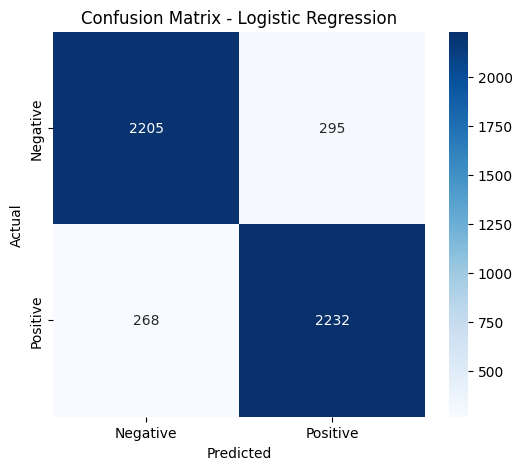


===== Linear SVM (20% Test Set) =====
Accuracy: 0.8882 | Precision: 0.8896 | Recall: 0.8864 | F1-Score: 0.8880


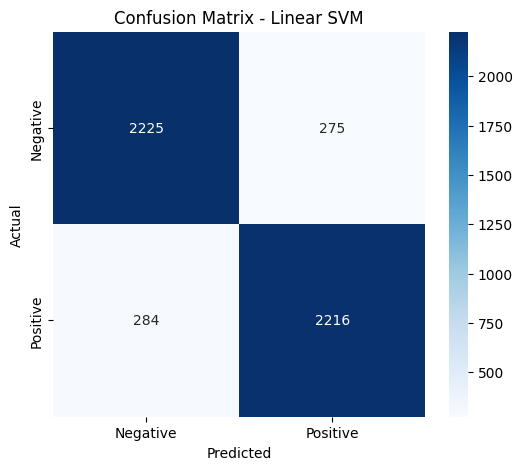


===== Multinomial NB (20% Test Set) =====
Accuracy: 0.8674 | Precision: 0.8871 | Recall: 0.8420 | F1-Score: 0.8639


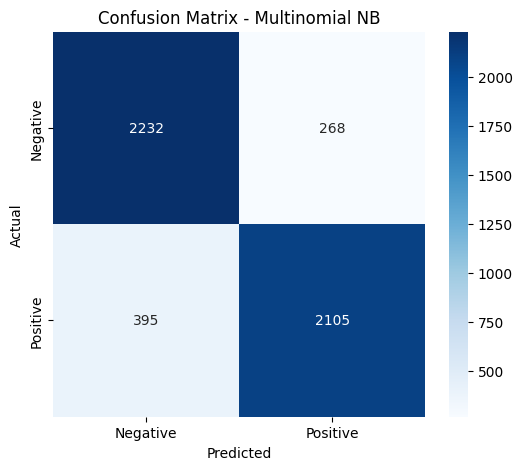


===== Random Forest (20% Test Set) =====
Accuracy: 0.8560 | Precision: 0.8669 | Recall: 0.8412 | F1-Score: 0.8538


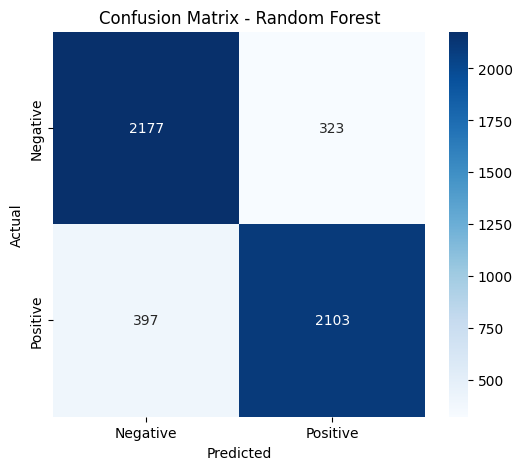


===== Gradient Boosting (20% Test Set) =====
Accuracy: 0.8272 | Precision: 0.8059 | Recall: 0.8620 | F1-Score: 0.8330


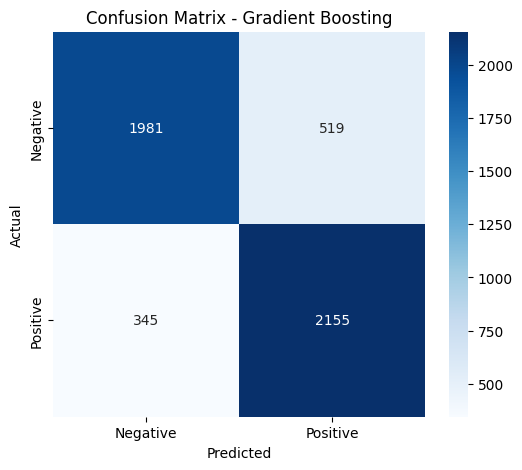


===== Stacking Ensemble (20% Test Set) =====
Accuracy: 0.8940 | Precision: 0.9001 | Recall: 0.8864 | F1-Score: 0.8932


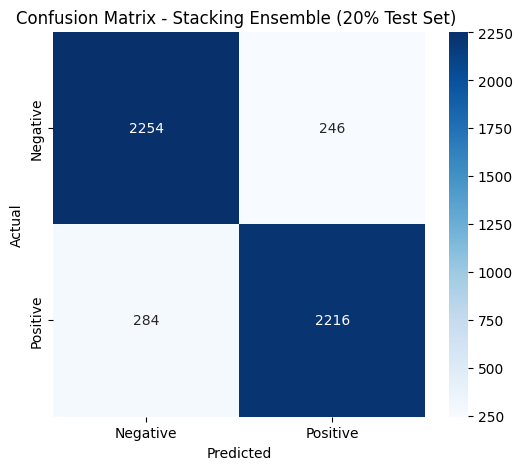

In [15]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Transform test set to TF-IDF representation ===
test_tfidf = tfidf_vectorizer.transform(X_test)
y_true_test = y_test  # Store true labels for test set

# === Define classifiers to evaluate ===
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(max_iter=200),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

# === Evaluate each individual classifier ===
for name, clf in classifiers.items():
    print(f"\n===== {name} (20% Test Set) =====")
    
    # Train model on training data
    clf.fit(X_tfidf, y_train)
    
    # Predict on the test set
    y_pred_test = clf.predict(test_tfidf)
    
    # Calculate performance metrics
    acc = accuracy_score(y_true_test, y_pred_test)
    prec = precision_score(y_true_test, y_pred_test, pos_label=1)
    rec = recall_score(y_true_test, y_pred_test, pos_label=1)
    f1 = f1_score(y_true_test, y_pred_test, pos_label=1)
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_true_test, y_pred_test)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# === Stacking Ensemble Classifier ===
base_classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Linear SVM', LinearSVC(max_iter=200)),
    ('Multinomial NB', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42))
]

# Create stacking model with Logistic Regression as final estimator
stack_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(max_iter=200),
    n_jobs=-1
)

# Train stacking model and predict on test set
stack_model.fit(X_tfidf, y_train)
y_pred_stack_test = stack_model.predict(test_tfidf)

# Calculate performance metrics for stacking model
acc = accuracy_score(y_true_test, y_pred_stack_test)
prec = precision_score(y_true_test, y_pred_stack_test, pos_label=1)
rec = recall_score(y_true_test, y_pred_stack_test, pos_label=1)
f1 = f1_score(y_true_test, y_pred_stack_test, pos_label=1)
print(f"\n===== Stacking Ensemble (20% Test Set) =====")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")

# Confusion matrix for stacking model
cm = confusion_matrix(y_true_test, y_pred_stack_test)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Ensemble (20% Test Set) ")
plt.show()

## Model Evaluation on Extra Test Set

In this step, we test the trained classifiers on an **external test set** (unseen data).  
The evaluation procedure is identical to the 20% hold-out test set but helps verify how well the models generalize to completely new samples.

We evaluate:
- Logistic Regression
- Linear SVM
- Multinomial Naive Bayes
- Random Forest
- Gradient Boosting
- Stacking Ensemble (combining the above models with Logistic Regression as final estimator)

For each model:
1. Train on the full training dataset.
2. Predict on the extra test set.
3. Calculate Accuracy, Precision, Recall, and F1-score.
4. Visualize the confusion matrix.



===== Logistic Regression (Extra Test Set) =====
Accuracy: 0.8791 | Precision: 0.8782 | Recall: 0.8804 | F1-Score: 0.8793


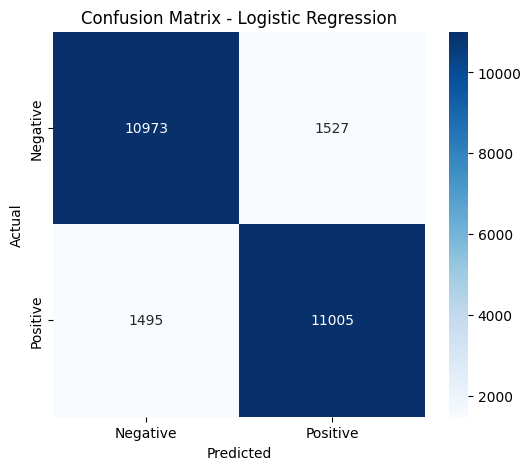


===== Linear SVM (Extra Test Set) =====
Accuracy: 0.8690 | Precision: 0.8772 | Recall: 0.8581 | F1-Score: 0.8675


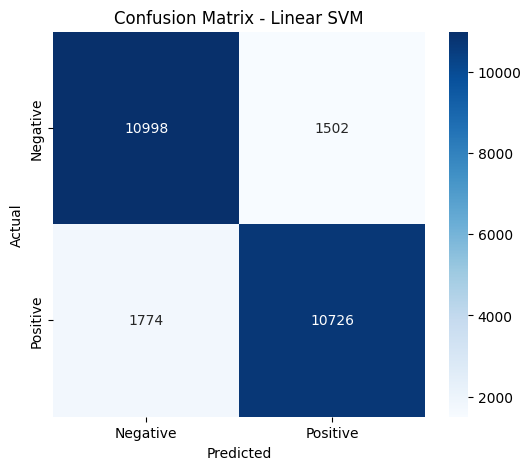


===== Multinomial NB (Extra Test Set) =====
Accuracy: 0.8340 | Precision: 0.8715 | Recall: 0.7835 | F1-Score: 0.8252


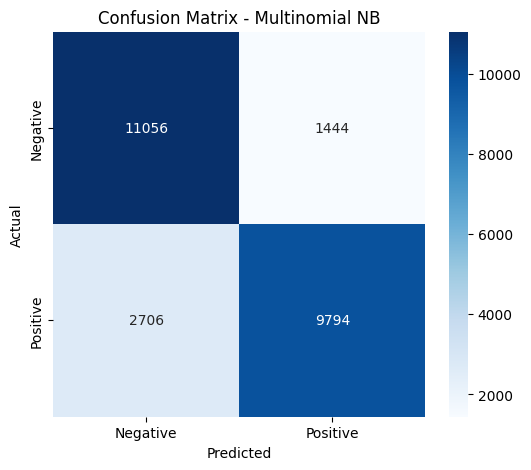


===== Random Forest (Extra Test Set) =====
Accuracy: 0.8507 | Precision: 0.8591 | Recall: 0.8390 | F1-Score: 0.8489


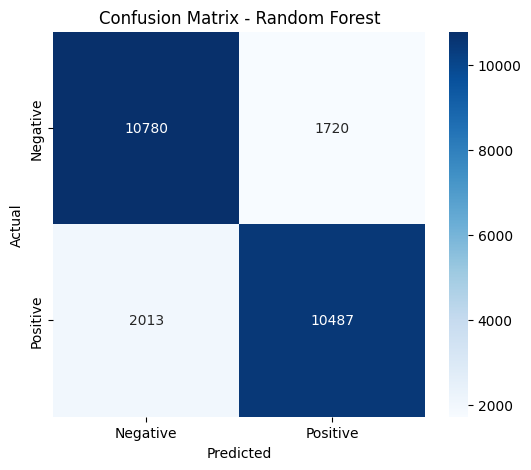


===== Gradient Boosting (Extra Test Set) =====
Accuracy: 0.8298 | Precision: 0.8060 | Recall: 0.8688 | F1-Score: 0.8362


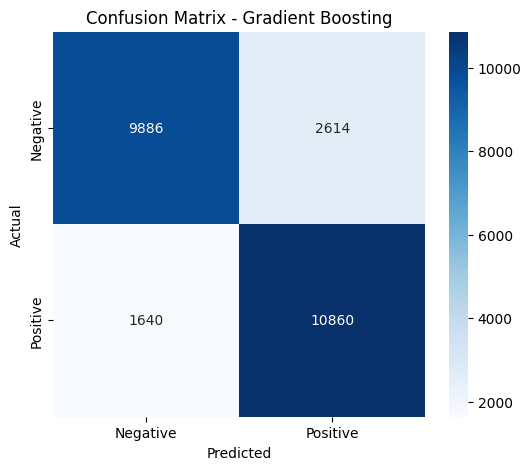


===== Stacking Ensemble (Extra Test Set) =====
Accuracy: 0.8772 | Precision: 0.8893 | Recall: 0.8615 | F1-Score: 0.8752


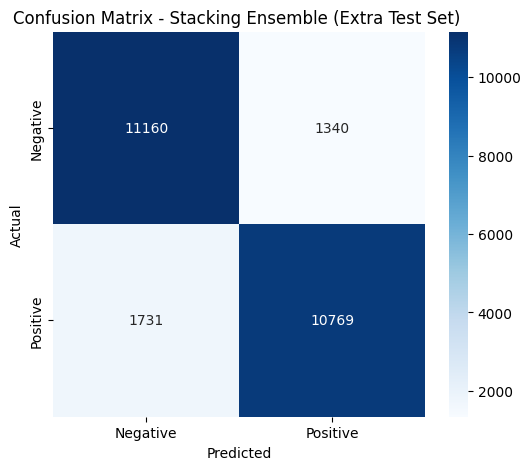

In [16]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# === Transform Extra Test Set using same TF-IDF vectorizer ===
extra_test_tfidf = tfidf_vectorizer.transform(extra_test_df["preprocessed"])
y_true_extra = extra_test_df["1"]  # Ground truth labels for extra test set

# === Define individual classifiers ===
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Linear SVM": LinearSVC(max_iter=200),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, random_state=42)
}

# === Evaluate each classifier on extra test set ===
for name, clf in classifiers.items():
    print(f"\n===== {name} (Extra Test Set) =====")
    
    # Train model on full training data
    clf.fit(X_tfidf, y_train)
    
    # Predict labels for extra test set
    y_pred_extra = clf.predict(extra_test_tfidf)
    
    # Calculate performance metrics
    acc = accuracy_score(y_true_extra, y_pred_extra)
    prec = precision_score(y_true_extra, y_pred_extra, pos_label=1)
    rec = recall_score(y_true_extra, y_pred_extra, pos_label=1)
    f1 = f1_score(y_true_extra, y_pred_extra, pos_label=1)
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_true_extra, y_pred_extra)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

# === Stacking Ensemble setup ===
base_classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Linear SVM', LinearSVC(max_iter=200)),
    ('Multinomial NB', MultinomialNB()),
    ('Random Forest', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=200, random_state=42))
]

# Create stacking classifier with Logistic Regression as final estimator
stack_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(max_iter=200),
    n_jobs=-1
)

# Train stacking model and predict
stack_model.fit(X_tfidf, y_train)
y_pred_stack_extra = stack_model.predict(extra_test_tfidf)

# Calculate performance metrics for stacking model
acc = accuracy_score(y_true_extra, y_pred_stack_extra)
prec = precision_score(y_true_extra, y_pred_stack_extra, pos_label=1)
rec = recall_score(y_true_extra, y_pred_stack_extra, pos_label=1)
f1 = f1_score(y_true_extra, y_pred_stack_extra, pos_label=1)
print(f"\n===== Stacking Ensemble (Extra Test Set) =====")
print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1-Score: {f1:.4f}")

# Confusion matrix visualization for stacking model
cm = confusion_matrix(y_true_extra, y_pred_stack_extra)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Stacking Ensemble (Extra Test Set) ")
plt.show()

### Saving Trained Models and Vectorizer

In this step, we save all trained classifiers, the stacking model, and the TF-IDF vectorizer to disk for future use.

- **Folder Creation**:  
  A directory named `saved_models` is created if it doesn't already exist.  
  This ensures all model files are stored in one place.

- **Model Saving**:  
  Each classifier is saved as a `.pkl` file using `joblib`.  
  The filenames are generated based on the classifier's name (spaces replaced with underscores).

- **Stacking Model**:  
  The trained stacking model is also saved as `stacking_model.pkl`.

- **TF-IDF Vectorizer**:  
  Saved as `tfidf_vectorizer.pkl` to ensure that the exact preprocessing used during training can be applied during prediction.

> These saved files can be loaded later to make predictions without retraining.


In [17]:
import joblib
import os

# Create a folder to store saved models
os.makedirs("saved_models", exist_ok=True)

# Save individual classifiers
for name, clf in classifiers.items():
    model_path = f"saved_models/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(clf, model_path)
    print(f"Saved {name} to {model_path}")

# Save stacking model
joblib.dump(stack_model, "saved_models/stacking_model.pkl")
print("Saved Stacking Model to saved_models/stacking_model.pkl")

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, "saved_models/tfidf_vectorizer.pkl")
print("Saved TF-IDF Vectorizer to saved_models/tfidf_vectorizer.pkl")

Saved Logistic Regression to saved_models/logistic_regression.pkl
Saved Linear SVM to saved_models/linear_svm.pkl
Saved Multinomial NB to saved_models/multinomial_nb.pkl
Saved Random Forest to saved_models/random_forest.pkl
Saved Gradient Boosting to saved_models/gradient_boosting.pkl
Saved Stacking Model to saved_models/stacking_model.pkl
Saved TF-IDF Vectorizer to saved_models/tfidf_vectorizer.pkl


###  Demo: Real-Time Sentiment Prediction

This script allows a user to test the trained model interactively without retraining:

1. **Load Saved Files**:
   - Loads the TF-IDF vectorizer (`tfidf_vectorizer.pkl`) for consistent preprocessing.
   - Loads the trained model (`stacking_model.pkl` by default).

2. **Interactive Prediction Loop**:
   - Prompts the user to enter a sentence.
   - Transforms the sentence into TF-IDF features.
   - Uses the trained model to predict sentiment.
   - Displays the result immediately.
   - Type `'exit'` to quit the loop.

> You can replace `stacking_model.pkl` with any other `.pkl` model you saved to test different classifiers.

In [18]:
import joblib
import sys

# ===== Load Saved TF-IDF Vectorizer and Model =====
vectorizer = joblib.load("/kaggle/working/saved_models/tfidf_vectorizer.pkl")
model = joblib.load("/kaggle/working/saved_models/stacking_model.pkl")  

# ===== Define fallback demo sentences for non-interactive mode =====
demo_sentences = [
    "I really enjoyed this product, it’s fantastic!",
    "This was the worst service I’ve ever had.",
    "It’s okay, nothing special."
]

# ===== Function to predict sentiment =====
def predict_sentiment(text):
    input_tfidf = vectorizer.transform([text])
    pred_label = model.predict(input_tfidf)[0]
    sentiment = "Positive" if pred_label == 1 else "Negative"
    return sentiment, pred_label

# ===== Check if running interactively =====
interactive_mode = sys.stdin.isatty()

if interactive_mode:
    print("=== Interactive Sentiment Prediction ===")
    while True:
        user_input = input("\nEnter a sentence (or type 'exit' to quit): ")
        if user_input.lower() == "exit":
            print("Exiting demo.")
            break
        sentiment, pred_label = predict_sentiment(user_input)
        print(f"Predicted Sentiment: {sentiment} (Label: {pred_label})")
else:
    print("=== Non-Interactive Mode: Demo Sentences ===")
    for sentence in demo_sentences:
        sentiment, pred_label = predict_sentiment(sentence)
        print(f"Sentence: {sentence}")
        print(f"Predicted Sentiment: {sentiment} (Label: {pred_label})\n")

=== Non-Interactive Mode: Demo Sentences ===
Sentence: I really enjoyed this product, it’s fantastic!
Predicted Sentiment: Positive (Label: 1)

Sentence: This was the worst service I’ve ever had.
Predicted Sentiment: Negative (Label: 0)

Sentence: It’s okay, nothing special.
Predicted Sentiment: Negative (Label: 0)

